In [1]:
from heapq import merge

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

#from rope.base.oi.soa import analyze_module
from scipy.stats import linregress
import libraries as lib

In [2]:
# Voorbeeld van hoe je de functie kunt aanroepen
directory = "../../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240701_20240707_monaco/20240705_endurance/0197 - 20240705T112922 4h42m28s 12.770km Monte-Carlo - Saint-Roman - Monte-Carlo"
result = lib.DataUitzoekenGui(directory)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_05.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [ ]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result:
    merged_df = result['merged_df']
else:
    print("De data is nog niet geladen.")

In [22]:
# Convert 'Latitude' and 'Longitude' to numeric, setting errors='coerce' to convert non-numeric values to NaN
merged_df['Latitude'] = pd.to_numeric(merged_df['Latitude'], errors='coerce')
merged_df['Longitude'] = pd.to_numeric(merged_df['Longitude'], errors='coerce')
merged_df['Snelheid over de grond in km/h'] = pd.to_numeric(merged_df['Snelheid over de grond in km/h'], errors='coerce')
merged_df['Discharge 1 stroom'] = pd.to_numeric(merged_df['Discharge 1 stroom'], errors='coerce')
merged_df['Discharge 1 spanning'] = pd.to_numeric(merged_df['Discharge 1 spanning'], errors='coerce')

# Filter out rows where 'Latitude' or 'Longitude' is NaN
merged_df = merged_df.dropna(subset=['Latitude', 'Longitude'])

# Filter rows where 'Latitude' is between 4300 and 4400 and 'Longitude' is between 700 and 800
filtered_df = merged_df[(merged_df['Latitude'] >= 4300) &
                        (merged_df['Latitude'] <= 4400) &
                        (merged_df['Longitude'] >= 700) &
                        (merged_df['Longitude'] <= 800) &
                        (merged_df['Snelheid over de grond in km/h'] >= 0) &
                        (merged_df['Snelheid over de grond in km/h'] <= 50)]
filtered_df

,Datalogger port_x,"Dataloggertijd, in s_x","MPPT-tijd, in s_x","Paneel 1 ingangsstroom, in I_x","Paneel 1 instantaan ingangsvermogen, in W_x","Paneel 1 totale ingangsenergie, in J_x","Paneel 2 ingangsspanning, in V_x","Paneel 2 ingangsstroom, in I_x","Paneel 2 instantaan ingangsvermogen, in W_x","Paneel 2 totale ingangsenergie, in J_x",...,Board Temperature,Format header (>08|05),Tijd,Status,Latitude,Noord of Zuid (N/S),Longitude,Oost of West (E/W),Magnetische directie,Mode indicator (D)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:49,2.0,49.006987,56.208318,-0.015096,-0.626077,-19.724692,23.640192,-0.006663,-0.290913,-8.132875,...,34.5,08|05,092923.000,A,4344.2300,N,725.6064,E,None,D
0 days 00:00:50,2.0,50.007589,57.208904,-0.015140,-0.627692,-20.086280,23.639794,-0.006729,-0.280832,-8.298551,...,34.4,08|05,092924.000,A,4344.2300,N,725.6067,E,None,D
0 days 00:00:51,2.0,50.994165,58.195450,-0.015202,-0.634471,-20.446452,23.639471,-0.006769,-0.284923,-8.463462,...,34.4,08|05,092925.000,A,4344.2300,N,725.6067,E,None,D
0 days 00:00:52,2.0,52.000039,59.201312,-0.015101,-0.631422,-20.811853,23.639661,-0.006826,-0.277651,-8.630440,...,34.4,08|05,092926.000,A,4344.2300,N,725.6067,E,None,D
0 days 00:00:53,2.0,52.994510,60.195757,-0.015147,-0.632092,-21.175440,23.639633,-0.006394,-0.260798,-8.783817,...,34.4,08|05,092927.000,A,4344.2300,N,725.6066,E,None,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 04:43:12,2.0,16991.991864,16998.833398,4.046173,138.764959,417999.639694,19.448245,4.026418,135.617429,405709.586020,...,43.2,08|05,141146.000,A,4344.3610,N,725.9590,E,None,A
0 days 04:43:13,2.0,16992.999294,16999.840747,4.054758,138.872404,418080.368182,19.397859,4.044929,135.549626,405788.492929,...,43.2,08|05,141147.000,A,4344.3595,N,725.9564,E,None,A
0 days 04:43:14,2.0,16994.001971,17000.843444,4.201677,145.680212,418162.549596,19.235636,4.239626,141.424636,405868.481212,...,43.2,08|05,141148.000,A,4344.3583,N,725.9535,E,None,A


In [37]:
#display all usful columns form filtered_df
data = filtered_df[['Latitude', 'Longitude', 'Snelheid over de grond in km/h', 'Tijd sinds boot in seconden', 'tijd', 'Totale accu stroom gefilterd',"Paneel 1 totale ingangsenergie, in J", "Paneel 2 totale ingangsenergie, in J", "Paneel 1 totale ingangsenergie, in J_x",
"Paneel 2 totale ingangsenergie, in J_x",
"Paneel 1 totale ingangsenergie, in J_y",
"Paneel 2 totale ingangsenergie, in J_y",
"Paneel 1 totale ingangsenergie, in J_x",
"Paneel 2 totale ingangsenergie, in J_x",
"Paneel 1 totale ingangsenergie, in J_y",
"Paneel 2 totale ingangsenergie, in J_y"]].copy()
data

,Latitude,Longitude,Snelheid over de grond in km/h,Tijd sinds boot in seconden,tijd,Totale accu stroom gefilterd,"Paneel 1 totale ingangsenergie, in J","Paneel 2 totale ingangsenergie, in J","Paneel 1 totale ingangsenergie, in J_x","Paneel 1 totale ingangsenergie, in J_x",...,"Paneel 2 totale ingangsenergie, in J_y","Paneel 2 totale ingangsenergie, in J_y","Paneel 1 totale ingangsenergie, in J_x","Paneel 1 totale ingangsenergie, in J_x","Paneel 2 totale ingangsenergie, in J_x","Paneel 2 totale ingangsenergie, in J_x","Paneel 1 totale ingangsenergie, in J_y","Paneel 1 totale ingangsenergie, in J_y","Paneel 2 totale ingangsenergie, in J_y","Paneel 2 totale ingangsenergie, in J_y"
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:49,4344.2300,725.6064,0.0,NaN,NaN,NaN,0.014000,0.082218,-19.724692,-24.840206,...,-11.140941,1.401495,-19.724692,-24.840206,-8.132875,-18.512374,-34.875029,23.137449,-11.140941,1.401495
0 days 00:00:50,4344.2300,725.6067,0.0,NaN,NaN,NaN,0.014046,0.083630,-20.086280,-25.298084,...,-11.356040,1.428150,-20.086280,-25.298084,-8.298551,-18.859477,-35.506525,23.476785,-11.356040,1.428150
0 days 00:00:51,4344.2300,725.6067,0.0,NaN,NaN,NaN,0.015000,0.085243,-20.446452,-25.752500,...,-11.568388,1.455879,-20.446452,-25.752500,-8.463462,-19.207125,-36.136767,23.806907,-11.568388,1.455879
0 days 00:00:52,4344.2300,725.6067,0.0,NaN,NaN,NaN,0.015000,0.086622,-20.811853,-26.211217,...,-11.783243,1.483936,-20.811853,-26.211217,-8.630440,-19.554123,-36.777093,24.125373,-11.783243,1.483936
0 days 00:00:53,4344.2300,725.6066,0.0,NaN,NaN,NaN,0.015000,0.088241,-21.175440,-26.671308,...,-11.995257,1.509361,-21.175440,-26.671308,-8.783817,-19.902542,-37.408457,24.440583,-11.995257,1.509361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 04:43:12,4344.3610,725.9590,15.7,17001.0825,160351.625,-28.760000,210750.886768,205846.945354,417999.639694,225419.543299,...,260113.251531,1080.201745,417999.639694,225419.543299,405709.586020,230392.824330,249691.515102,213540.272059,260113.251531,1080.201745
0 days 04:43:13,4344.3595,725.9564,14.8,17002.0825,160352.625,-28.763125,210830.866667,205925.945455,418080.368182,225501.575408,...,260195.431340,1080.291854,418080.368182,225501.575408,405788.492929,230475.056429,249772.899588,213618.688252,260195.431340,1080.291854
0 days 04:43:14,4344.3583,725.9535,15.0,17003.0825,160353.625,-28.765000,210911.960102,206006.559796,418162.549596,225585.037576,...,260280.220505,1080.385845,418162.549596,225585.037576,405868.481212,230558.911111,249856.878182,213699.165437,260280.220505,1080.385845


In [38]:
# Example usage with the new dataset
data_new = data.copy()

data_new = lib.calculate_distance_from_speed(data_new)
data_new = lib.calculate_distance_from_gps(data_new)
data_new = lib.calculate_total_energy_MPPTS(data_new)

AttributeError: module 'libraries' has no attribute 'calculate_distance_from_speed'

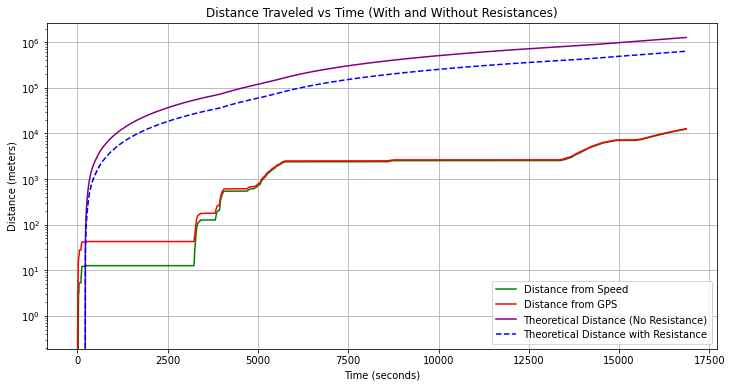

In [35]:
def calculate_theoretical_distance(data, mass_kg=1000):
    """
    Calculate the theoretical distance assuming no resistances, using total energy available.
    
    Parameters:
    - data: DataFrame containing energy data.
    - mass_kg: Mass of the boat in kg (default is 1000 kg).
    
    Returns:
    - DataFrame with theoretical cumulative distance over time.
    """
    # Calculate total energy available (accu + solar)
    total_energy = data['Totale accu stroom gefilterd'] + data['Total Solar Energy (J)']
    total_energy = total_energy.fillna(0).clip(lower=0)  # Ensure no NaN or negative energy values
    
    # Calculate theoretical speed using E = 1/2 * m * v^2 -> v = sqrt(2 * E / m)
    data['Theoretical Speed (m/s)'] = np.sqrt(2 * total_energy / mass_kg)
    data['Theoretical Speed (m/s)'] = data['Theoretical Speed (m/s)'].fillna(0)  # Replace NaN values with 0
    
    # Calculate theoretical cumulative distance as speed * time interval
    data['Theoretical Distance (m)'] = data['Theoretical Speed (m/s)'].cumsum()
    return data

def calculate_theoretical_distance_with_resistance(data, mass_kg=1000, Cd_water=0.2, A_water=2, Cd_air=0.5, A_air=3, rho_water=1000, rho_air=1.225):
    """
    Calculate the theoretical distance with resistances (water and air) included.
    
    Parameters:
    - data: DataFrame containing energy data.
    - mass_kg: Mass of the boat in kg (default is 1000 kg).
    - Cd_water: Drag coefficient for water.
    - A_water: Surface area underwater in m².
    - Cd_air: Drag coefficient for air.
    - A_air: Surface area above water in m².
    - rho_water: Density of water in kg/m³ (default is 1000).
    - rho_air: Density of air in kg/m³ (default is 1.225).
    
    Returns:
    - DataFrame with theoretical cumulative distance over time, considering resistances.
    """
    # Calculate total energy available (accu + solar)
    total_energy = data['Totale accu stroom gefilterd'] + data['Total Solar Energy (J)']
    total_energy = total_energy.fillna(0).clip(lower=0)  # Ensure no NaN or negative energy values
    
    distances = []
    speeds = []
    cumulative_distance = 0
    previous_speed = 0
    time_interval = 1  # Assuming 1-second intervals
    
    for energy in total_energy:
        # Calculate the resistances only if speed is greater than zero
        if previous_speed > 0:
            F_water = 0.5 * rho_water * Cd_water * A_water * previous_speed**2
            F_air = 0.5 * rho_air * Cd_air * A_air * previous_speed**2
        else:
            F_water = 0
            F_air = 0
        total_resistance = F_water + F_air
        
        # Net energy after overcoming resistance
        net_energy = energy - (total_resistance * cumulative_distance)
        net_energy = max(net_energy, 0)  # Ensure no negative energy
        
        # Calculate new speed using E = 1/2 * m * v^2 -> v = sqrt(2 * E / m)
        new_speed = np.sqrt(2 * net_energy / mass_kg)
        
        # Calculate distance for this time interval
        distance = new_speed * time_interval
        cumulative_distance += distance
        
        # Append cumulative distance and speed
        distances.append(cumulative_distance)
        speeds.append(new_speed)
        
        # Update previous speed
        previous_speed = new_speed
    
    data['Theoretical Distance with Resistance (m)'] = distances
    data['Speed with Resistance (m/s)'] = speeds
    return data


data_new = calculate_theoretical_distance(data_new)
data_new = calculate_theoretical_distance_with_resistance(data_new)

# Plotting distance traveled versus time for the four distance calculations
time = range(len(data_new))

plt.figure(figsize=(12, 6))

# Plot distance versus time
plt.plot(time, data_new['Cumulative Distance from Speed (m)'], label='Distance from Speed', color='green')
plt.plot(time, data_new['Cumulative Distance from GPS (m)'], label='Distance from GPS', color='red')
plt.plot(time, data_new['Theoretical Distance (m)'], label='Theoretical Distance (No Resistance)', color='purple', linestyle='-')
plt.plot(time, data_new['Theoretical Distance with Resistance (m)'], label='Theoretical Distance with Resistance', color='blue', linestyle='--')

plt.xlabel('Time (seconds)')
plt.ylabel('Distance (meters)')
plt.title('Distance Traveled vs Time (With and Without Resistances)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
data_new

,Latitude,Longitude,Snelheid over de grond in km/h,Tijd sinds boot in seconden,tijd,Totale accu stroom gefilterd,"Paneel 1 totale ingangsenergie, in J","Paneel 2 totale ingangsenergie, in J","Paneel 1 totale ingangsenergie, in J_x","Paneel 1 totale ingangsenergie, in J_x",...,"Paneel 1 totale ingangsenergie, in J_y","Paneel 2 totale ingangsenergie, in J_y","Paneel 2 totale ingangsenergie, in J_y",Cumulative Distance from Speed (m),Cumulative Distance from GPS (m),Total Solar Energy (J),Theoretical Speed (m/s),Theoretical Distance (m),Theoretical Distance with Resistance (m),Speed with Resistance (m/s)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:49,4344.2300,725.6064,0.0,NaN,NaN,NaN,0.014000,0.082218,-19.724692,-24.840206,...,23.137449,-11.140941,1.401495,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
0 days 00:00:50,4344.2300,725.6067,0.0,NaN,NaN,NaN,0.014046,0.083630,-20.086280,-25.298084,...,23.476785,-11.356040,1.428150,0.000000,0.402797,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
0 days 00:00:51,4344.2300,725.6067,0.0,NaN,NaN,NaN,0.015000,0.085243,-20.446452,-25.752500,...,23.806907,-11.568388,1.455879,0.000000,0.402797,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
0 days 00:00:52,4344.2300,725.6067,0.0,NaN,NaN,NaN,0.015000,0.086622,-20.811853,-26.211217,...,24.125373,-11.783243,1.483936,0.000000,0.402797,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
0 days 00:00:53,4344.2300,725.6066,0.0,NaN,NaN,NaN,0.015000,0.088241,-21.175440,-26.671308,...,24.440583,-11.995257,1.509361,0.000000,0.537063,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 04:43:12,4344.3610,725.9590,15.7,17001.0825,160351.625,-28.760000,210750.886768,205846.945354,417999.639694,225419.543299,...,213540.272059,260113.251531,1080.201745,12498.444444,12763.450560,1.644817e+07,181.373337,1.272909e+06,636501.206339,181.373337
0 days 04:43:13,4344.3595,725.9564,14.8,17002.0825,160352.625,-28.763125,210830.866667,205925.945455,418080.368182,225501.575408,...,213618.688252,260195.431340,1080.291854,12502.555556,12767.911620,1.645286e+07,181.399176,1.273091e+06,636501.206339,0.000000
0 days 04:43:14,4344.3583,725.9535,15.0,17003.0825,160353.625,-28.765000,210911.960102,206006.559796,418162.549596,225585.037576,...,213699.165437,260280.220505,1080.385845,12506.722222,12772.394674,1.645765e+07,181.425592,1.273272e+06,636682.631931,181.425592
